In [1]:
import FEMpy
FEMpy.__version__

'1.0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def coefficient_function(coords):
    return 1

In [4]:
def source_function(coord):
    x, y = coord
    return -2 * (np.power(x, 2) + np.power(y, 2)) + 4

In [5]:
def dirichlet_function(coord):
    return 0

In [12]:
basis = FEMpy.TriangularBasis2D("linear")
mesh = FEMpy.TriangularMesh2D(-1, 1, -1, 1, h1=1 / 8, h2=1 / 8, basis_type="linear")

In [13]:
# mesh.boundary_edges[1, 100:300]
# mesh.boundary_nodes.shape
# mesh.num_elements_x
# mesh.num_elements_y
mesh.boundary_edges.shape
# mesh.boundary_nodes

(2, 64)

In [14]:
# boundary_node_types = [
#     "dirichlet",
#     *["dirichlet"] * 7,
#     *["dirichlet"] * 9,
#     *["dirichlet"] * 8,
#     *["dirichlet"] * 7,
# ]
boundary_node_types = ["dirichlet"]*64
boundary_edge_types = ["dirichlet"]*64

In [15]:
bcs = FEMpy.BoundaryConditions2D(
    mesh,
    boundary_node_types,
    boundary_edge_types,
    test_basis=basis,
    dirichlet_fun=dirichlet_function,
    coeff_fun=coefficient_function,
)

In [16]:
poisson_eq = FEMpy.Poisson2D(
    mesh, fe_test_basis=basis, fe_trial_basis=basis, boundary_conditions=bcs
)

In [17]:
solution = poisson_eq.solve(coefficient_function, source_function)

In [18]:
solution.shape

(289,)

<Figure size 432x288 with 0 Axes>

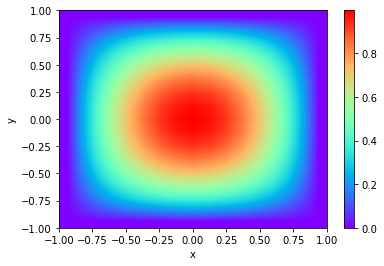

In [22]:
plt.figure()
fig, ax = plt.subplots()
h = ax.imshow(
    solution.reshape(17, 17),
    Interpolation="bilinear",
    cmap="rainbow",
    extent=[-1, 1, -1, 1],
    origin="lower",
    aspect="auto",
)
# ax.set_title("Deep Neural Network Solution")
ax.set_xlabel(r"x")
ax.set_ylabel(r"y")
plt.colorbar(h)
plt.savefig("res_nonsingular.pdf")

In [23]:
def analytic_solution(coord):
    x, y = coord
    return (1-np.power(x, 2))*(1-np.power(y, 2))


def dx_analytic_solution(coord):
    x, y = coord
    return -2*x*(1-np.power(y, 2))


def dy_analytic_solution(coord):
    x, y = coord
    return -2*y*(1-np.power(x, 2))

In [24]:
L_inf_err = poisson_eq.l_inf_error(analytic_solution)
L_2_err = poisson_eq.l2_error(analytic_solution)
H_1_err = poisson_eq.h1_seminorm_error((dx_analytic_solution, dy_analytic_solution))

from IPython.display import display, Math
display(Math('\|L^\infty\| = {l_inf:.3e}'.format(l_inf=L_inf_err)))
display(Math('\|L^2\| = {l_2:.3e}'.format(l_2=L_2_err)))
display(Math('|H^1| = {h_1:.3e}'.format(h_1=H_1_err)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>